In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import stats

In [16]:
police_graphs = pd.read_csv('../data/police_eda.csv')

In [17]:
police_graphs.head()

,Unique ID,Date of injury resulting in death (month/day/year),City,State,Zip Code,County,Latitude,Longitude,Agency responsible for death,Cause of death,Intentional Use of Force (Developing),Date (Year)
0,25746,01/01/2000,Willits,CA,95490.0,MENDOCINO,39.470883,-123.361751,Mendocino County Sheriff's Office,Vehicle,Vehicle/Pursuit,2000.0
1,25747,01/01/2000,Detroit,MI,48203.0,WAYNE,42.404526,-83.092274,NaN,Vehicle,Vehicle/Pursuit,2000.0
2,25748,01/01/2000,Detroit,MI,48203.0,WAYNE,42.404526,-83.092274,NaN,Vehicle,Vehicle/Pursuit,2000.0
3,25749,01/01/2000,Carlsbad,NM,88220.0,EDDY,32.450080,-104.237643,Eddy County Sheriff's Office,Vehicle,Vehicle/Pursuit,2000.0
4,2,01/02/2000,Ellenwood,GA,30294.0,DE KALB,33.645164,-84.229413,DeKalb County Sheriff's Office,Gunshot,"Intentional Use of Force, Deadly",2000.0


In [18]:
police_graphs = police_graphs[police_graphs['Date (Year)'] != 2100.0]

In [19]:
year_count = police_graphs.groupby('Date (Year)').count()
year_df = year_count.reset_index()
year_df

,Date (Year),Unique ID,Date of injury resulting in death (month/day/year),City,State,Zip Code,County,Latitude,Longitude,Agency responsible for death,Cause of death,Intentional Use of Force (Developing)
0,2000.0,831,831,830,831,806,830,831,831,826,831,831
1,2001.0,907,907,907,907,894,907,907,907,906,907,907
2,2002.0,961,961,960,961,949,960,961,961,961,961,961
3,2003.0,1008,1008,1007,1008,989,1008,1008,1008,1007,1008,1008
4,2004.0,1014,1014,1010,1014,1000,1013,1014,1014,1014,1014,1014
5,2005.0,1133,1133,1128,1133,1121,1133,1133,1133,1133,1133,1133
6,2006.0,1234,1234,1232,1234,1217,1234,1234,1234,1233,1234,1234
7,2007.0,1210,1210,1208,1210,1196,1208,1210,1210,1205,1210,1210
8,2008.0,1169,1169,1166,1169,1164,1167,1169,1169,1164,1169,1169
9,2009.0,1240,1240,1238,1240,1230,1240,1240,1240,1233,1240,1240


In [20]:
year_df['Date (Year)'] = year_df['Date (Year)'].astype(int)
year_df

,Date (Year),Unique ID,Date of injury resulting in death (month/day/year),City,State,Zip Code,County,Latitude,Longitude,Agency responsible for death,Cause of death,Intentional Use of Force (Developing)
0,2000,831,831,830,831,806,830,831,831,826,831,831
1,2001,907,907,907,907,894,907,907,907,906,907,907
2,2002,961,961,960,961,949,960,961,961,961,961,961
3,2003,1008,1008,1007,1008,989,1008,1008,1008,1007,1008,1008
4,2004,1014,1014,1010,1014,1000,1013,1014,1014,1014,1014,1014
5,2005,1133,1133,1128,1133,1121,1133,1133,1133,1133,1133,1133
6,2006,1234,1234,1232,1234,1217,1234,1234,1234,1233,1234,1234
7,2007,1210,1210,1208,1210,1196,1208,1210,1210,1205,1210,1210
8,2008,1169,1169,1166,1169,1164,1167,1169,1169,1164,1169,1169
9,2009,1240,1240,1238,1240,1230,1240,1240,1240,1233,1240,1240


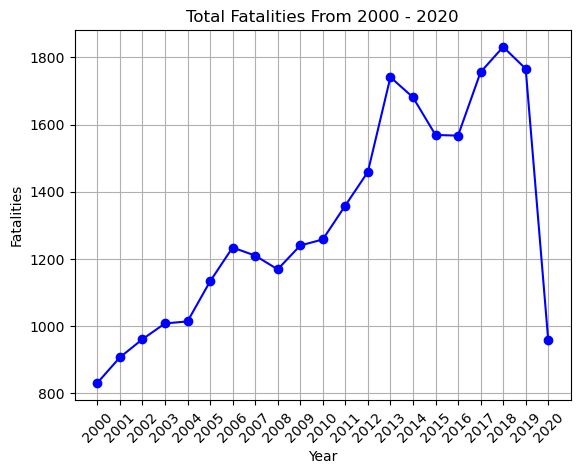

In [25]:
plt.plot(year_df['Date (Year)'], year_df['Unique ID'], marker='o', color='b', linestyle='-')

# Add labels and title
plt.title('Total Fatalities From 2000 - 2020')
plt.xlabel('Year')
plt.ylabel('Fatalities')
plt.xticks(rotation=45)
plt.xticks(year_df['Date (Year)'].astype(int))
# Show plot
plt.grid(True)
plt.show()